## Background
* Millenial generation and housing.
    * There has been a near constant discussion of the Millenial generation and husing; especially around Millenials struggles to own a home.
    * As this Denver Post article describes the average colorado home price has increased over % 450 in the last 31 years ([*Source*](https://www.denverpost.com/2021/07/04/millennials-debt-wealth-housing-health-care-colorado/)) this price increase coupled with the high student debt many Millenials have has dramatically impacted the rate of home ownership for Millenials.
    * In addition to student debt and rising house prices Millenials have also had to live through two recessions. As this article from business insider describes these additional issues coupled with a housing shortage are limiting Millenials opportunitities to own a home ([*Source*](https://www.businessinsider.com/housing-market-forecast-millennials-buying-homes-crisis-2021-4)).
* These issues can also be seen in the number of hits for 'millenials and housing':
    * Over 10 million hits overall
    * Over 200 thousand news articles

## Problem Statement

As described in the background Millenials have a low home ownership rate. Having to rent instead of paying into a mortgage can negatively impact Millenials current and future finances as they may be paying more than a mortgage and not seeing any return on those payments. Using linear regression I will attempt to identify important features that predict a homes saleprice in the Ames, IA dataset. I will conduct a Naive or baseline model, a common real estate features model, and a complex feature model. By examing which features are most in the complext model I may be able to illuminate high value features that aren't neccessary for Millenial or other first-time home buyers. Success in the context of this project will be defined as finding at least one impactful feature that is not in the naive or common features model.

## Standard Imports

In [26]:
import pandas as pd 
#intended to solve copy on slice warnings/issues
pd.options.mode.chained_assignment = None
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Data Cleaning Process

I made a number of notes in ([*this Google Doc*](https://docs.google.com/document/d/1uThpvNZ_xxrwrA9rXgYtPUprQRT2oCxLcL_c94uW4Lk/edit?usp=sharing)) on the type of many of the variables and how to encode them.

In [2]:
train = pd.read_csv('./datasets/train.csv')
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [3]:
train.shape

(2051, 81)

In [6]:
train.isna().sum().sum()

9822

In [5]:
train['Id'].sort_values()

1080       1
304        3
574        5
1673       8
458        9
        ... 
1013    2924
1478    2926
416     2927
651     2929
522     2930
Name: Id, Length: 2051, dtype: int64

In [6]:
train['PID'].sort_values()

1080    526301100
1623    526302030
1923    526302040
108     526303060
304     526351010
          ...    
507     924100060
651     924100070
1324    924151040
522     924151050
1033    924152030
Name: PID, Length: 2051, dtype: int64

In [7]:
#Neither ID seem important to predicting the price of a house, however ID will be in the test data so we should keep that
train.drop(columns=['PID'], inplace=True)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   MS SubClass      2051 non-null   int64  
 2   MS Zoning        2051 non-null   object 
 3   Lot Frontage     1721 non-null   float64
 4   Lot Area         2051 non-null   int64  
 5   Street           2051 non-null   object 
 6   Alley            140 non-null    object 
 7   Lot Shape        2051 non-null   object 
 8   Land Contour     2051 non-null   object 
 9   Utilities        2051 non-null   object 
 10  Lot Config       2051 non-null   object 
 11  Land Slope       2051 non-null   object 
 12  Neighborhood     2051 non-null   object 
 13  Condition 1      2051 non-null   object 
 14  Condition 2      2051 non-null   object 
 15  Bldg Type        2051 non-null   object 
 16  House Style      2051 non-null   object 
 17  Overall Qual  

In [10]:
#Making columns easier to work with, from pandas document on .rename
train.rename(str.lower, axis=1, inplace=True)

#from stack overflow https://stackoverflow.com/questions/42462530/how-to-replace-the-white-space-in-a-string-in-a-pandas-dataframe
#https://www.geeksforgeeks.org/remove-spaces-from-column-names-in-pandas/
train.columns = train.columns.str.replace(' ', '_')

train.head()

In [11]:
train.shape

(2051, 80)

### Addressing Nulls

Addressing Columns that were mistakenly read in with NaN values based on the Ames,IA data dictionary

In [13]:
#pandas is treating na or no alley as a Nan
train['alley'] = train['alley'].replace(np.nan, 'no')

In [14]:
train['alley'].isna().sum()

0

In [15]:
#same issue for fence
train['fence'] = train['fence'].replace(np.nan, 'no')

In [16]:
#only 22 missing in both masonry variables, thats ~1% or less of the data, probably okay to just fill with 0's
train['mas_vnr_area'].fillna(0, inplace=True)

In [18]:
train['mas_vnr_area'].isna().sum()

0

In [17]:
train['mas_vnr_type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [18]:
#only 22 missing in both masonry variables, thats ~1% or less of the data, probably okay to just fill with None's
train['mas_vnr_type'].fillna('None', inplace=True)

In [19]:
train['mas_vnr_type'].isna().sum()

0

In [27]:
#linear feet of street connected to property, I guess it could be possible to get a 0 for this, 330 is a lot, but still lets fill as 0
#train['lot_frontage'].isna().sum()
train[['lot_frontage']].fillna(0, inplace=True)

In [28]:
#very low non-null counts, but likely has a high impact on price... what to do???? Lets keep and check in later models
train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [24]:
train.columns[70:81]

Index(['pool_area', 'pool_qc', 'fence', 'misc_feature', 'misc_val', 'mo_sold',
       'yr_sold', 'sale_type', 'saleprice'],
      dtype='object')

In [29]:
#ordinal features pulled from the data dict used the train.columns[:] function above to double check had all variables in linked google doc
ord_feat = ['lot_shape', 'utilities', 'land_slope', 'overall_qual', 'overall_cond', 'exter_cond', 'exter_qual', 'bsmtfin_type_1', 'bsmtfin_type_2', 'bsmt_cond', 
            'bsmt_qual', 'bsmt_exposure', 'electrical', 'heating_qc', 'functional', 'kitchen_qual', 'fireplace_qu', 'garage_finish', 'garage_qual',
           'garage_cond', 'paved_drive', 'fence']

In [30]:
train[ord_feat].isna().sum()

lot_shape            0
utilities            0
land_slope           0
overall_qual         0
overall_cond         0
exter_cond           0
exter_qual           0
bsmtfin_type_1      55
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmt_exposure       58
electrical           0
heating_qc           0
functional           0
kitchen_qual         0
fireplace_qu      1000
garage_finish      114
garage_qual        114
garage_cond        114
paved_drive          0
fence                0
dtype: int64

In [31]:
train['fireplaces'].value_counts()

0    1000
1     898
2     146
3       6
4       1
Name: fireplaces, dtype: int64

In [32]:
#mapping NaN in Fireplace_qu to be 0 since NA means no fireplace
train['fireplace_qu'].fillna(0)

0        0
1       TA
2        0
3        0
4        0
        ..
2046    Gd
2047     0
2048    TA
2049    Gd
2050    TA
Name: fireplace_qu, Length: 2051, dtype: object

In [33]:
#function to fill NaN values
def NaN_to_zero(df, col):
    if df[col].isna().sum() >= 1:
        df[col].fillna(0, inplace = True)
    else:
        print('f{col} has no nulls')
    return df[col].value_counts()

In [34]:
NaN_to_zero(train, 'fireplace_qu')

0     1000
Gd     523
TA     407
Fa      59
Po      31
Ex      31
Name: fireplace_qu, dtype: int64

In [35]:
train['pool_qc'].isna().sum()

2042

In [36]:
null_is_0_list = ['alley', 'bsmt_cond', 'bsmt_qual', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_type_2', 'fireplace_qu', 
                  'garage_type', 'garage_finish', 'garage_cond', 'garage_qual', 'pool_qc', 'fence']

In [38]:
#function used on columns found to have nulls that should be 0s
[NaN_to_zero(train, col) for col in null_is_0_list]

f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls
f{col} has no nulls


[no      1911
 Grvl      85
 Pave      55
 Name: alley, dtype: int64,
 TA    1834
 Gd      89
 Fa      65
 0       55
 Po       5
 Ex       3
 Name: bsmt_cond, dtype: int64,
 TA    887
 Gd    864
 Ex    184
 Fa     60
 0      55
 Po      1
 Name: bsmt_qual, dtype: int64,
 No    1339
 Av     288
 Gd     203
 Mn     163
 0       58
 Name: bsmt_exposure, dtype: int64,
 GLQ    615
 Unf    603
 ALQ    293
 BLQ    200
 Rec    183
 LwQ    102
 0       55
 Name: bsmtfin_type_1, dtype: int64,
 Unf    1749
 Rec      80
 LwQ      60
 0        56
 BLQ      48
 ALQ      35
 GLQ      23
 Name: bsmtfin_type_2, dtype: int64,
 0     1000
 Gd     523
 TA     407
 Fa      59
 Po      31
 Ex      31
 Name: fireplace_qu, dtype: int64,
 Attchd     1213
 Detchd      536
 BuiltIn     132
 0           113
 Basment      27
 2Types       19
 CarPort      11
 Name: garage_type, dtype: int64,
 Unf    849
 RFn    579
 Fin    509
 0      114
 Name: garage_finish, dtype: int64,
 TA    1868
 0      114
 Fa      47
 Gd

In [40]:
#double checking that all Nulls were addressed
[col for col in train.columns if train[col].isna().sum() > 1]

['lot_frontage',
 'bsmt_full_bath',
 'bsmt_half_bath',
 'garage_yr_blt',
 'misc_feature']

In [41]:
train['lot_frontage'].isna().sum()

330

In [47]:
#drop 2 from bsmnt bath columns as they are from the same rows
train['bsmt_full_bath'].isna().sum()

2

In [48]:
train['bsmt_half_bath'].isna().sum()

2

In [49]:
train['bsmt_half_bath'].value_counts()

0.0    1923
1.0     122
2.0       4
Name: bsmt_half_bath, dtype: int64

In [50]:
train[(train['bsmt_full_bath'] != 0 ) & (train['bsmt_full_bath'] != 1 ) & (train['bsmt_full_bath'] != 2) & (train['bsmt_full_bath'] != 3)]['bsmt_full_bath']

616    NaN
1327   NaN
Name: bsmt_full_bath, dtype: float64

In [51]:
train[(train['bsmt_half_bath'] != 0 ) & (train['bsmt_half_bath'] != 1 ) & (train['bsmt_half_bath'] != 2) & (train['bsmt_full_bath'] != 3)]['bsmt_full_bath']

616    NaN
1327   NaN
Name: bsmt_full_bath, dtype: float64

In [52]:
train.shape

(2051, 80)

In [53]:
train['bsmt_full_bath'].fillna(value= 0, inplace=True)

In [54]:
train['bsmt_half_bath'].fillna(value= 0, inplace=True)

In [56]:
#checking nulls again
[col for col in train.columns if train[col].isna().sum() > 1]

['lot_frontage', 'garage_yr_blt', 'misc_feature']

In [57]:
NaN_to_zero(train, 'lot_frontage')

0.0      330
60.0     179
70.0      96
80.0      94
50.0      90
        ... 
115.0      1
22.0       1
116.0      1
138.0      1
137.0      1
Name: lot_frontage, Length: 119, dtype: int64

In [58]:
[col for col in train.columns if train[col].isna().sum() > 1]

['garage_yr_blt', 'misc_feature']

In [59]:
train['garage_yr_blt'].isna().sum()

114

In [60]:
train['garage_area'].value_counts()

0.0       113
440.0      70
576.0      69
484.0      52
528.0      46
         ... 
808.0       1
752.0       1
858.0       1
422.0       1
1174.0      1
Name: garage_area, Length: 514, dtype: int64

In [61]:
#113 as 0 for garage area and 114 that are 0 for garage year built, so 1 that's actually a missing value

In [62]:
NaN_to_zero(train, 'garage_yr_blt')

0.0       114
2005.0    105
2007.0     84
2006.0     80
2004.0     72
         ... 
2207.0      1
1895.0      1
1918.0      1
1933.0      1
1919.0      1
Name: garage_yr_blt, Length: 101, dtype: int64

In [63]:
train['misc_feature'].value_counts()

Shed    56
Gar2     4
Othr     3
Elev     1
TenC     1
Name: misc_feature, dtype: int64

In [64]:
train['misc_feature'].isna().sum()

1986

In [65]:
NaN_to_zero(train, 'misc_feature')

0       1986
Shed      56
Gar2       4
Othr       3
Elev       1
TenC       1
Name: misc_feature, dtype: int64

In [66]:
[col for col in train.columns if train[col].isna().sum() > 1]

[]

In [55]:
#finally got all of the NaNs out of the dataset.

#### Dropping Specific Outliers as suggested in Data Dictionary Special Note

There was a note at the end of the Data Dict indicating that there were 5 outliers that the originator of the dataset suggested be dropped. The following code and plots aatempts to ilsolate these outliers and then drop them. Specifically the instructions are to "I would remove any houses with more than 4000 square feet from the data set..." The author suggests using the Ground Living Area variable to find these outliers.

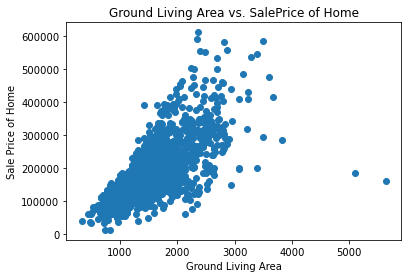

In [68]:
plt.scatter(x= 'gr_liv_area', y= 'saleprice', data=train)
plt.title('Ground Living Area vs. SalePrice of Home')

plt.xlabel('Ground Living Area')

plt.ylabel('Sale Price of Home');

In [69]:
train[['1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'gr_liv_area']].sort_values('gr_liv_area', ascending=False).head()

,1st_flr_sf,2nd_flr_sf,total_bsmt_sf,gr_liv_area
960,4692,950,6110.0,5642
1885,5095,0,5095.0,5095
616,3820,0,0.0,3820
1897,1836,1836,1836.0,3672
1035,1518,1518,1107.0,3608


In [70]:
#I found 2 and am dropping 960 & 1885 based on the special note at the end of the dat dictionary
train.drop([960, 1885], inplace=True)

In [71]:
train[['1st_flr_sf', '2nd_flr_sf', 'total_bsmt_sf', 'gr_liv_area']].sort_values('gr_liv_area', ascending=False).head()

,1st_flr_sf,2nd_flr_sf,total_bsmt_sf,gr_liv_area
616,3820,0,0.0,3820
1897,1836,1836,1836.0,3672
1035,1518,1518,1107.0,3608
1692,1933,1567,1733.0,3500
1939,1675,1818,1470.0,3493


In [72]:
train.shape

(2049, 80)

In [61]:
# Saving the cleaned up file to CSV for use in other notebooks
train.to_csv('./datasets/train_data_cleaned_v1')